# ORIE 4741 Project

Group Members: Lu Cao, Elva Gao, Kinya Wang

Dataset Link:  https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/

## Import packages

In [42]:
# from google.colab import drive
# import os
# drive.mount('/content/drive', force_remount=True)

In [43]:
import numpy as np

# random
import random
from numpy.random import rand, randn

# dataframes
import pandas as pd

# plotting
import matplotlib.pyplot as plt
# linear regression two ways
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from patsy import dmatrices

import seaborn as sns

import statistics as stats

## Import data

In [44]:
# feature_path = os.path.join(os.getcwd(), "drive", "My Drive", "2021 Fall", "OR4741", "or4741-main", 'DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv')
# labels_path = os.path.join(os.getcwd(), "drive", "My Drive", "2021 Fall", "OR4741", "or4741-main", 'DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv')

# features = pd.read_csv(feature_path)
# labels = pd.read_csv(labels_path)

features = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv')
labels = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv')
features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [45]:
features.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [46]:
labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [47]:
labels.describe()

,year,weekofyear,total_cases
count,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,24.675137
std,5.408314,15.019437,43.596000
min,1990.000000,1.000000,0.000000
25%,1997.000000,13.750000,5.000000
50%,2002.000000,26.500000,12.000000
75%,2005.000000,39.250000,28.000000
max,2010.000000,53.000000,461.000000


# Data cleaning

In [48]:
# from datetime import date

# def d(s):
#   year, month, day = map(int, s.split('-'))
#   return date(year, month, day)

# def days(start, end):
#   return (d(end) - d(start)).days

In [49]:
# convert categorical features (specifically, city name) using one-hot encoding
x_df = pd.get_dummies(features['city'])
features.pop('city')
df = pd.concat([x_df, features.reindex(x_df.index)], axis=1)
# convert start date to float
# # from datetime import datetime
# # df['week_start_date']=pd.to_numeric(datetime.strptime(df['week_start_date'], format='%Y-%m-%d'))
# # df['week_start_date']= df['week_start_date']-min(df['week_start_date'])
# # df.head()
# from datetime import date
# min_date = df['week_start_date'].iloc[0]
# df['week_start_date']= df['week_start_date'].apply(lambda x: days( min_date,x))
df.head()

,iq,sj,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0,1,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,0,1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,0,1,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,0,1,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,0,1,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [50]:
#count number of missing values for each column
print(df.isna().sum())

iq                                         0
sj                                         0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_ma

<Figure size 864x576 with 0 Axes>

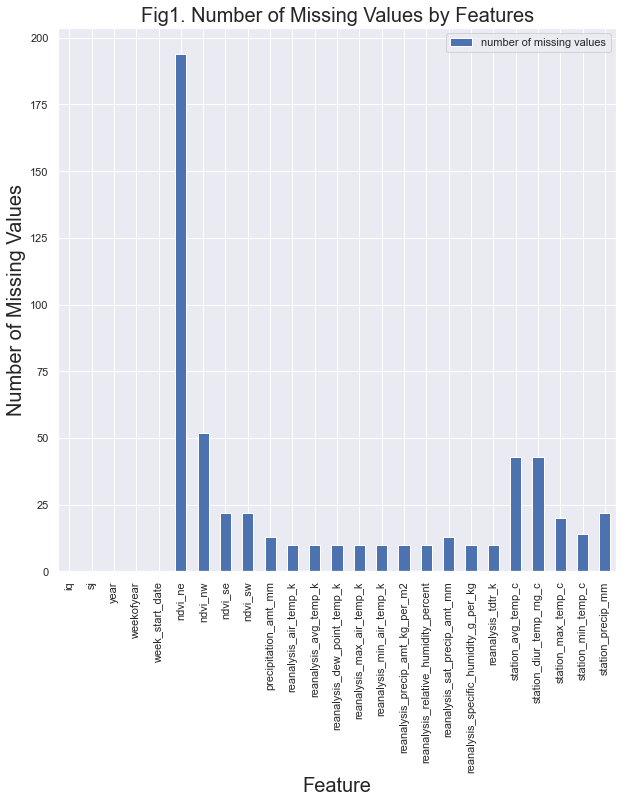

In [51]:
#Plot
plt.figure(figsize=(12,8)) 
df.isna().sum().reset_index(name="number of missing values").plot.bar(x='index', y= "number of missing values", rot=90,figsize=(10,10))
plt.xlabel('Feature', fontsize =20)
plt.ylabel('Number of Missing Values', fontsize =20)
plt.title("Fig1. Number of Missing Values by Features", fontsize =20)
plt.show()
#impute missing values based on the avearge of the previous and next values. 
df = df.interpolate()

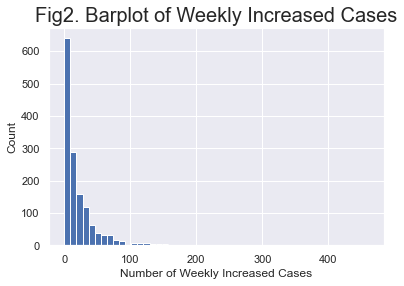

In [52]:
# # of weekly increased cases mostly under 100
plt.hist(labels['total_cases'], bins = 50)
plt.ylabel("Count")
plt.xlabel("Number of Weekly Increased Cases")
plt.title("Fig2. Barplot of Weekly Increased Cases", fontsize =20)
plt.show() 

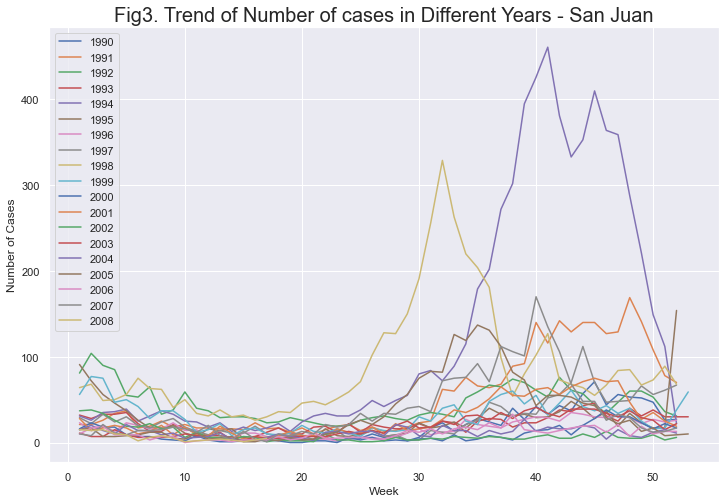

In [53]:
# trend of weeks of year
plt.figure(figsize=(12,8)) 
y_df_sj = labels[labels['city'] == 'sj']
y_df_iq = labels[labels['city'] == 'iq']
week_sj = y_df_sj['year'].unique()
week_iq = y_df_iq['year'].unique()
for week in week_sj:
    temp = y_df_sj[y_df_sj['year'] == week]
    temp = temp.sort_values(by=['weekofyear'])
    plt.plot(temp['weekofyear'], temp['total_cases'], label = week)
plt.legend()
plt.xlabel("Week")
plt.ylabel("Number of Cases")
plt.title("Fig3. Trend of Number of cases in Different Years - San Juan", fontsize =20)
plt.show()

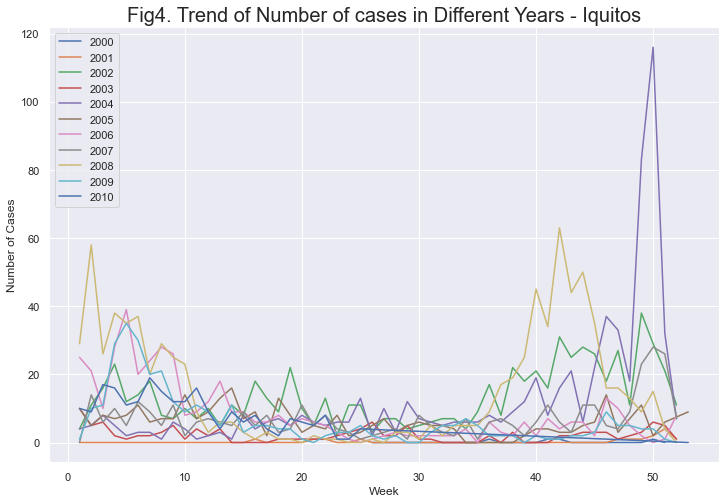

In [54]:
# trend of weeks of year
plt.figure(figsize=(12,8)) 
for week in week_iq:
    temp = y_df_iq[y_df_iq['year'] == week]
    temp = temp.sort_values(by=['weekofyear'])
    plt.plot(temp['weekofyear'], temp['total_cases'], label = week)
plt.legend()
plt.xlabel("Week")
plt.ylabel("Number of Cases")
plt.title("Fig4. Trend of Number of cases in Different Years - Iquitos", fontsize =20)
plt.show()

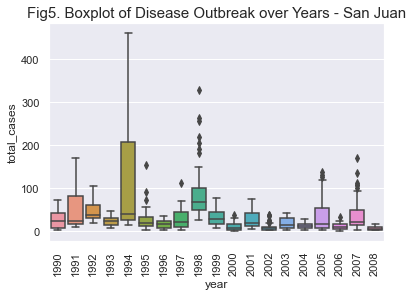

In [55]:
# sj trend over year 
ax = sns.boxplot(data = y_df_sj, x='year',y='total_cases')
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.title("Fig5. Boxplot of Disease Outbreak over Years - San Juan", fontsize =15)
plt.show()

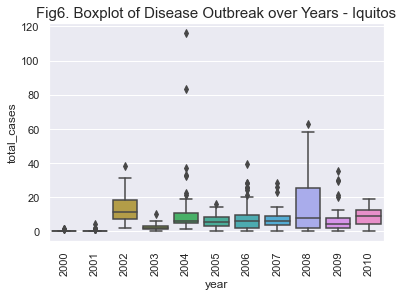

In [56]:
# iq trend over year 
ax = sns.boxplot(data = y_df_iq, x='year',y='total_cases')
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.title("Fig6. Boxplot of Disease Outbreak over Years - Iquitos", fontsize =15)
plt.show()

## The two heatmaps

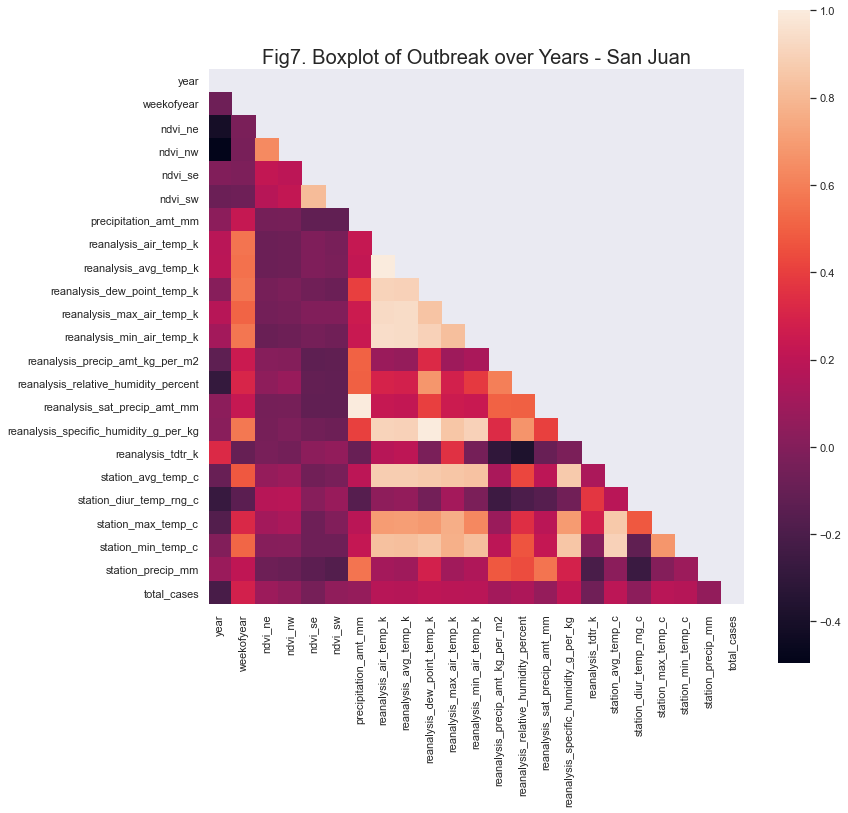

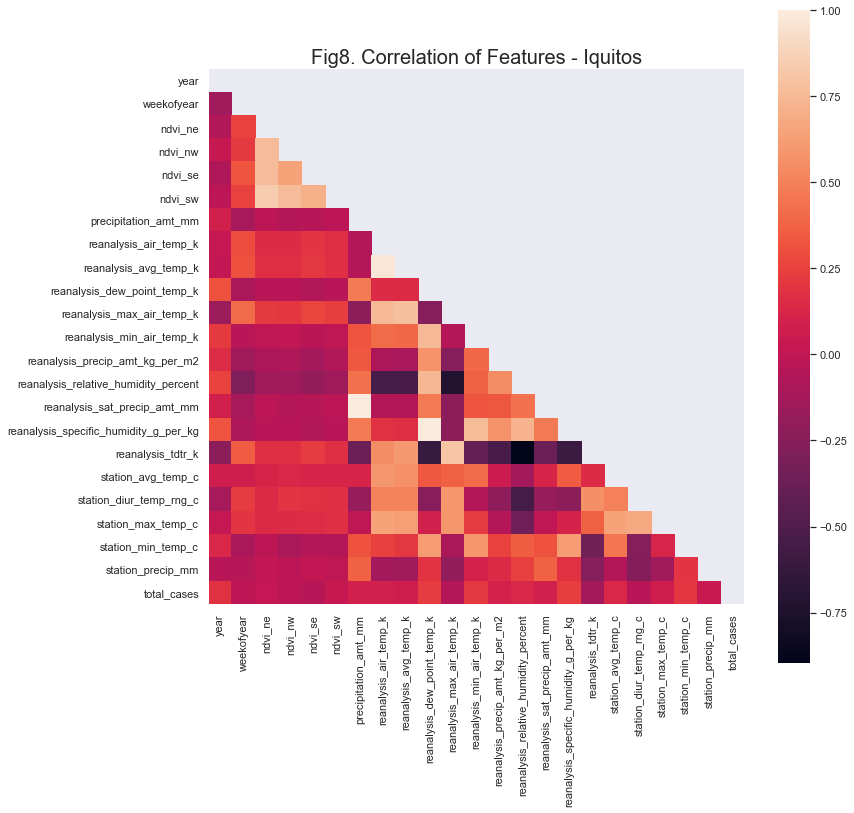

In [57]:
#heatmap of sj
df_sj = df[df['sj'] == 1]
df_sj = df_sj.drop(columns = ['iq', 'sj'])
df_sj = df_sj.merge(y_df_sj, on=['year', 'weekofyear'], how='left').drop(columns = ['city'])
corr_sj = df_sj.corr()
mask = np.triu(np.ones_like(corr_sj))
plt.figure(figsize = (12,12))
sns.heatmap(corr_sj, square=True, mask=mask)
plt.title("Fig7. Boxplot of Outbreak over Years - San Juan", fontsize =20)
plt.show()

#heatmap of iq
df_iq = df[df['iq'] == 1]
df_iq = df_iq.drop(columns = ['iq', 'sj'])
df_iq = df_iq.merge(y_df_iq, on=['year', 'weekofyear'], how='left').drop(columns = ['city'])
corr_iq = df_iq.corr()
mask = np.triu(np.ones_like(corr_iq))
plt.figure(figsize = (12,12))
sns.heatmap(corr_iq, square=True, mask=mask)
plt.title("Fig8. Correlation of Features - Iquitos", fontsize =20) 
plt.show()

# Time series

https://builtin.com/data-science/time-series-python

         Values                       Metric
0 -6.650078e+00              Test Statistics
1  5.147319e-09                      p-value
2  9.000000e+00             No. of lags used
3  9.260000e+02  Number of observations used
4 -3.437432e+00          critical value (1%)
5 -2.864666e+00          critical value (5%)
6 -2.568435e+00         critical value (10%)


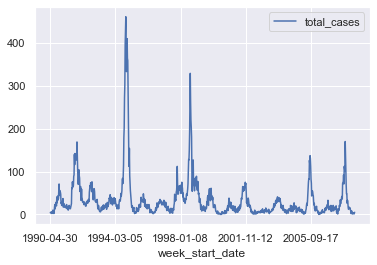

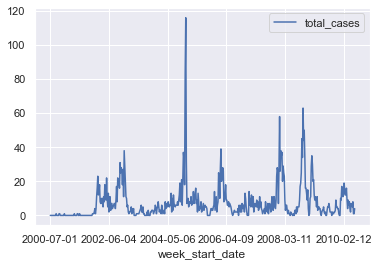

In [58]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
# plt.rcParams.update({'figure.figsize': (10, 10), 'figure.dpi': 120})

df_sj.plot(x='week_start_date', y='total_cases')
df_iq.plot(x='week_start_date', y='total_cases')

from statsmodels.tsa.stattools import adfuller
df_sj['Week'] = pd.to_numeric(pd.to_datetime(df['week_start_date'], format='%Y-%m-%d'))
df_sj['Week']
# df_sj.drop('week_start_date', axis=1, inplace=True)
df_sj_time = df_sj[['Week','total_cases']]
adft = adfuller(df_sj_time[['total_cases']] ,autolag="AIC")

output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

One Week Lag:  0.9648156532418702
Four Weeks Lag:  0.8141837443929425
Half Year Lag:  -0.06062824312044626
One Year Lag:  0.04506894304813205


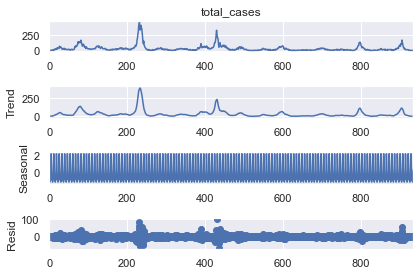

RangeIndex(start=0, stop=1456, step=1)
     year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
536  2000          33      2000-08-19  0.176450  0.130400  0.252200  0.205457   
537  2000          34      2000-08-26  0.215667  0.154233  0.198867  0.182871   
538  2000          35      2000-09-02  0.187383  0.243500  0.277600  0.193786   
539  2000          36      2000-09-09  0.159100  0.083600  0.253367  0.211250   
540  2000          37      2000-09-16  0.057700  0.150700  0.297186  0.254343   
..    ...         ...             ...       ...       ...       ...       ...   
931  2008          13      2008-03-25  0.077850 -0.039900  0.310471  0.296243   
932  2008          14      2008-04-01 -0.038000 -0.016833  0.119371  0.066386   
933  2008          15      2008-04-08 -0.155200 -0.052750  0.137757  0.141214   
934  2008          16      2008-04-15  0.001800 -0.031558  0.203900  0.209843   
935  2008          17      2008-04-22 -0.037000 -0.010367  0.077314  0

In [59]:
autocorrelation_lag1 = df_sj['total_cases'].autocorr(lag=1)
print("One Week Lag: ", autocorrelation_lag1)
autocorrelation_lag4 = df_sj['total_cases'].autocorr(lag=4)
print("Four Weeks Lag: ", autocorrelation_lag4)
autocorrelation_lag26 = df_sj['total_cases'].autocorr(lag=26)
print("Half Year Lag: ", autocorrelation_lag26)
autocorrelation_lag52 = df_sj['total_cases'].autocorr(lag=52)
print("One Year Lag: ", autocorrelation_lag52)

from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df_sj['total_cases'],model='additive', period=7)
decompose.plot()
plt.show()

print(df.index)
print(df_sj.tail(400))
print(df_sj_time.tail(400))

<ipython-input-60-094182771575>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['total_cases']
<ipython-input-60-094182771575>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['total_cases']


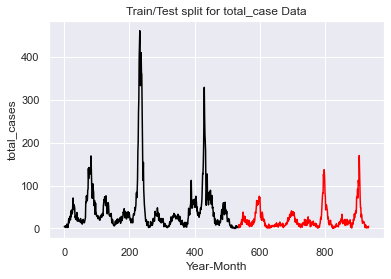

In [60]:
#split our data for training and testing and visualize the split:
# df_sj['Date'] = df_sj.index
a = 966643200000000000
train = df_sj_time[df_sj_time['Week'] < a]
train['train'] = train['total_cases']
del train['Week']
del train['total_cases']
test = df_sj_time[df_sj_time['Week'] >= a]
del test['Week']
test['test'] = test['total_cases']
del test['total_cases']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for total_case Data")
plt.ylabel("total_cases")
plt.xlabel('Year-Month')
sns.set()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4480.833, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5959.411, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4508.791, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5400.637, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6175.671, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4481.009, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4472.946, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4489.488, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4484.058, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=4478.722, Time=0.36 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=4481.054, Time=0.10 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=4482.040, Time=0.55 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4481.534, Time=0.07 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 2.332 seconds
RMSE:  33.400291288143

<ipython-input-61-3c4ab9092e31>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['total_cases']
<ipython-input-61-3c4ab9092e31>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['total_cases']


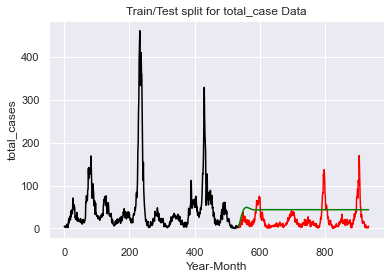

In [61]:
# !pip install pmdarima

from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

print(forecast)

#split our data for training and testing and visualize the split:
# df_sj['Date'] = df_sj.index
train = df_sj_time[df_sj_time['Week'] < a]
train['train'] = train['total_cases']
del train['Week']
del train['total_cases']
test = df_sj_time[df_sj_time['Week'] >= a]
del test['Week']
test['test'] = test['total_cases']
del test['total_cases']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(forecast, color = "green")


plt.title("Train/Test split for total_case Data")
plt.ylabel("total_cases")
plt.xlabel('Year-Month')
sns.set()
plt.show()

# Observation:
ndvi_ne, ndvi_nw, ndvi_se, ndvi_sw highly correlated
reanalysis_air_temp_k, reanalysis_avg_temp_k highly correlated

reanalysis_sat_precip_amt_mm, precipitation_amt_mm highly correlated


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, HuberRegressor, QuantileRegressor

In [66]:
#drop week_start_date column
df_iq.drop('week_start_date', axis=1, inplace=True)
df_sj.drop('week_start_date', axis=1, inplace=True)


# df.drop('Week', axis=1, inplace=True)
# df.describe()

In [67]:
Y_iq = df_iq['total_cases']
X_iq = df_iq.drop(columns = ['total_cases'])
X_iq = sm.add_constant(X_iq)
Y_sj = df_sj['total_cases']
X_sj = df_sj.drop(columns = ['total_cases'])
X_sj = sm.add_constant(X_sj)

In [68]:
xTrain_sj, xTest_sj, yTrain_sj, yTest_sj = train_test_split(X_sj, Y_sj, test_size=0.25, random_state=42)
xTrain_iq, xTest_iq, yTrain_iq, yTest_iq = train_test_split(X_iq, Y_iq, test_size=0.25, random_state=42)

# Regressions:
We want to try different regression methods with regularization to see if it can find best fitting weight

In [ ]:
# quadratic loss
model_sj = sm.OLS(yTrain_sj, xTrain_sj)
model_sj = model_sj.fit()
model_sj.summary()

In [ ]:
yPred_sj = model_sj.predict(xTest_sj)
plt.scatter(yTest_sj, yPred_sj)
x = np.linspace(0, max(max(yTest_sj), max(yPred_sj)), 10000)
plt.plot(x,x,color = "black")

In [ ]:
model_iq = sm.OLS( yTrain_iq, xTrain_iq)
model_iq = model_iq.fit()
model_iq.summary()

In [ ]:
yPred_iq = model_iq.predict(xTest_iq)
plt.scatter(yTest_iq, yPred_iq)
x = np.linspace(0, max(max(yTest_iq), max(yPred_iq)), 10000)
plt.plot(x,x,color = "black")

In [ ]:
# from above observation: we do have outliers -> l1 regression or regularization 
# l1 regression
# alphas = np.linspace(.01,1,100)
# lasso_error = []
# for alpha in alphas:
#     yhat_lasso = Lasso(alpha = alpha).fit(xTrain_sj, yTrain_sj).predict(xTest_sj)
#     lasso_error.append(sum(yTest_sj - yhat_lasso)**2)
# min_error = min(lasso_error)
# index = lasso_error.index(min_error)     
# best_alpha = alphas[index]
# model_sj = Lasso(alpha = best_alpha).fit(xTrain_sj, yTrain_sj)
# yPred_sj = model_sj.predict(xTest_sj)
# plt.scatter(yTest_sj, yPred_sj)
# x = np.linspace(0, max(max(yTest_sj), max(yPred_sj)), 10000)
# plt.plot(x,x,color = "black")
model_sj = QuantileRegressor(quantile=.5, fit_intercept=True, alpha=0).fit(xTrain_sj, yTrain_sj)
yPred_sj = model_sj.predict(xTest_sj)
plt.scatter(yTest_sj, yPred_sj)
x = np.linspace(0, max(max(yTest_sj), max(yPred_sj)), 10000)
plt.plot(x,x,color = "black")

In [ ]:
# huber regression
model_sj = HuberRegressor().fit(xTrain_sj, yTrain_sj)
yPred_sj = model_sj.predict(xTest_sj)
plt.scatter(yTest_sj, yPred_sj)
x = np.linspace(0, max(max(yTest_sj), max(yPred_sj)), 10000)
plt.plot(x,x,color = "black")

In [ ]:
# qunatile regression
quantiles = [0.05, 0.25, 0.75, 0.95]
min_err = 0
best_model = None
for quantile in quantiles:
  model_sj = QuantileRegressor(quantile=quantile, fit_intercept=True, alpha=0).fit(xTrain_sj, yTrain_sj)
  yPred_sj = model_sj.predict(xTest_sj) 
  curr_err = sum(yTest_sj - yPred_sj)**2
  if best_model is None:
    min_err = curr_err
    best_model = model_sj
  elif curr_err < min_err:
    min_err = curr_err
    best_model = model_sj
yPred_sj = best_model.predict(xTest_sj)
plt.scatter(yTest_sj, yPred_sj)
x = np.linspace(0, max(max(yTest_sj), max(yPred_sj)), 10000)
plt.plot(x,x,color = "black")

# Random Forest:
Random forests is a bagging approach for trees that also randomly selects the set of features each tree can use (to help decorrelate results). In addition to all the decision tree hyperparameters, random forests also let us choose the number of trees, whether to use bootstrapped samples for each tree, and the max number of features every tree can use.

In [ ]:
x = np.zeros(70)
for i in range(70):
    random_forest = RandomForestRegressor(n_estimators = i+1)

    x[i]=(cross_val_score(random_forest, xTrain_sj, yTrain_sj,
                    scoring="neg_mean_squared_error", 
                    cv=3).mean())

In [ ]:
plt.plot(range(1,71),x)
plt.xlabel("n_estimators")
plt.ylabel("neg_mean_squared_error")
plt.show()

In [ ]:
x = np.linspace(0, max(yTrain_sj), 10000)
random_forest = RandomForestRegressor(n_estimators = 15)
tree = random_forest.fit(xTrain_sj, yTrain_sj)
yPred_sj = tree.predict(xTest_sj)
plt.scatter(yTest_sj, yPred_sj)
plt.plot(x,x,color = "black")
plt.ylabel("predicted value")
plt.xlabel("true value")
plt.show()

In [ ]:
plt.scatter(yTest_sj, yPred_sj)
plt.plot(x,x,color = "black")
plt.ylabel("predicted value")
plt.xlabel("true value")
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.show()

In [ ]:
print('The gradient boosted MSE is ', np.mean(np.abs(yPred_sj - yTest_sj)))

# Gradient Boosting

Recall that boosting is the process of sequentially training weak learners to create a powerful prediction. In gradient boosting, each subsequent model is going to try to replicate the gradient of the loss function evaluated at the current model (almost mimicing gradient descent!). Let's try walking through a simple example manually.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# for i in np.arange(0.01,1.00,98):
grad_boost_tree = GradientBoostingRegressor(
                    loss = 'squared_error',
                    learning_rate = 0.8)

GB_model = grad_boost_tree.fit(xTrain_sj, yTrain_sj)

yPred_sj = GB_model.predict(xTest_sj)

print('The gradient boosted MSE is ',np.mean(np.abs(yPred_sj - yTest_sj)))

In [ ]:
x = np.linspace(0, max(yTrain), 10000)
grad_boost_tree = GradientBoostingRegressor(
                    loss = 'squared_error',
                    learning_rate = 0.7)

GB_model = grad_boost_tree.fit(xTrain_sj, yTrain_sj)

yPred = GB_model.predict(xTest_sj)

plt.scatter(yTest_sj, yPred_sj)
plt.plot(x,x,color = "black")
plt.ylabel("predicted value")
plt.xlabel("true value")
plt.show()

plt.scatter(yTest_sj, yPred_sj)
plt.plot(x,x,color = "black")
plt.ylabel("predicted value")
plt.xlabel("true value")
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.show()

some plot ideas: true num of cases vs. predicted num of cases.

some model ideas: emsemble; l1/l2/quadratic/huber ... table